In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('../data/imports-85.data', names=columns)

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null float64
fuel_system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 

## Data Cleaning

In [9]:
num_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [10]:
for num_col in num_cols:
    # replace '?' using the average values
    mean = np.mean([float(i) for i in cars[num_col] if i !='?'])
    # convert the columns to numeric types
    cars[num_col] = cars[num_col].replace('?', mean).astype(float)

In [11]:
# check the missing value for the numberic columns
cars[num_cols].isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# normalize the numeric columns from 0 to 1
num_cols.remove('price')
cars[num_cols] = (cars[num_cols] - cars[num_cols].mean()) / cars[num_cols].std()

## Univariate Model

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

def knn_train_test(df, features, target, k=5):
    """
    training and validation for the KNN model
    
    Args:
        df (pd.DataFrame) : the dataset
        features (str) : training column name
        target (str) : target column name
        k (int) : numbers of neighbors to use
        
    Returns:
        rmse (float) : root mean squared error of the model
    """
    
    # features and target
    X = df[[features]]
    y = df[target]

    # K-fold validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, X, y, scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    return np.mean(np.sqrt(np.absolute(mses)))

In [14]:
# train and test univariate models using the different numeric columns
for feature in num_cols:
    print(feature, ':', knn_train_test(cars, feature, 'price', k=5))

normalized_losses : 6603.714967604404
wheel_base : 5590.305176808108
length : 4924.736011195441
width : 4432.107184340802
height : 7541.301733236001
curb_weight : 4236.259721851486
engine_size : 3678.6290020141214
bore : 6847.79636759843
stroke : 7171.452086341655
compression_ratio : 6325.044398879167
horsepower : 4034.411706611866
peak_rpm : 7263.483266569341
city_mpg : 4777.97830094768
highway_mpg : 4197.081753539642


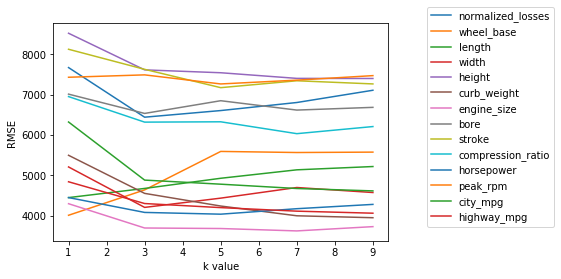

In [15]:
# train and test a univariate model using the different k values
k_values = [1, 3, 5, 7, 9]
feature_k_rmses = dict()
for feature in num_cols:
    k_rmses = dict()
    for k in k_values:
        k_rmses[k] = knn_train_test(cars, feature, 'price', k)
    feature_k_rmses[feature] = k_rmses
    
for feature, k_rmses in feature_k_rmses.items():
    x = sorted(k_rmses.keys())
    y = list(k_rmses.values())
    
    plt.plot(x, y, label=feature)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.show()

## Multivariate Model

In [16]:
# modify the function to accept a list of column names
def knn_train_test(df, features, target, k=5):
    """
    training and validation for the KNN model
    
    Args:
        df (pd.DataFrame) : the dataset
        features (list) : the list of training column names
        target (str) : target column name
        k (int) : numbers of neighbors to use
        
    Returns:
        rmse (float) : root mean squared error of the model
    """
    
    # features and target
    X = df[features]
    y = df[target]

    # K-fold validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, X, y, scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    return np.mean(np.sqrt(np.absolute(mses)))

In [17]:
# use all of the numerical columns
print(num_cols)
print('\navg rmse:', knn_train_test(cars, num_cols, 'price', k=5))

['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

avg rmse: 3649.538782134948


In [18]:
two_features = ['engine_size', 'horsepower']
print(two_features)
print('\navg rmse:', knn_train_test(cars, two_features, 'price', k=5))

['engine_size', 'horsepower']

avg rmse: 3043.298162524344


In [19]:
three_features = ['engine_size', 'horsepower', 'highway_mpg']
print(three_features)
print('\navg rmse:', knn_train_test(cars, three_features, 'price', k=5))

['engine_size', 'horsepower', 'highway_mpg']

avg rmse: 3048.4281249552387


In [20]:
four_features = ['engine_size', 'horsepower', 'highway_mpg', 'curb_weight']
print(four_features)
print('\navg rmse:', knn_train_test(cars, four_features, 'price', k=5))

['engine_size', 'horsepower', 'highway_mpg', 'curb_weight']

avg rmse: 3220.9250285844814


In [21]:
five_features = ['engine_size', 'horsepower', 'highway_mpg', 'curb_weight', 'width']
print(five_features)
print('\navg rmse:', knn_train_test(cars, five_features, 'price', k=5))

['engine_size', 'horsepower', 'highway_mpg', 'curb_weight', 'width']

avg rmse: 3183.3806115653088


## Hyperparameter Tuning

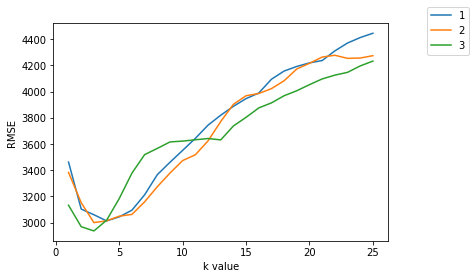

In [22]:
best_features = two_features
second_best_features = three_features
third_best_features = five_features
features_list = [best_features, second_best_features, third_best_features]

k_values = range(1, 26)
feature_k_rmses = dict()
for i, features in enumerate(features_list):
    k_rmses = dict()
    for k in k_values:
        k_rmses[k] = knn_train_test(cars, features, 'price', k)
    feature_k_rmses[i+1] = k_rmses
    
for features, k_rmses in feature_k_rmses.items():
    x = sorted(k_rmses.keys())
    y = list(k_rmses.values())
    
    plt.plot(x, y, label=features)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.show()